### 一、算法介绍
回归树是决策树的一种，用于处理回归问题，即预测连续值的任务。与分类树相比，回归树的目标是预测一个数量的输出。回归树模型通过将特征空间划分为一系列的简单区域来工作。为了做出预测，它使用每个区域内目标变量的平均值。这种方法是决策树理论的一部分，通过递归地将数据集分割成越来越小的子集来构建树。

### 二、算法原理

构建回归树的过程包括以下几个步骤：

1. **选择最佳分割特征与点**：
   回归树通过选择最佳分割特征和分割点来递归地划分数据集。分割的选择基于最小化某种度量标准，通常是均方误差（MSE）。

   均方误差可以定义为：

   $$
   MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
   $$

   其中，$y_i$ 是样本点的真实值，$\hat{y}_i$ 是区域内样本点的平均响应值。

2. **递归分割**：
   选择最优分割后，数据集被分为两个子节点。接下来，同样的分割过程应用于每个子节点，递归进行，直到满足停止条件（如达到指定的树的最大深度，或者每个节点的最小样本数）。

3. **剪枝**：
   为防止过拟合，需要对生成的树进行剪枝。剪枝通过移除树的部分分支来实现，这些分支对于模型的泛化能力提升没有帮助。常用的剪枝技术包括成本复杂度剪枝。


### 三、案例分析

此部分还是使用加利福尼亚房屋数据集，该数据集包含20640个样本，每个样本有8个特征，这些特征描述了加利福尼亚地区的房屋和人口统计特点，目标值是房屋的中位数价格。

首先，我们需要加载数据，划分训练集和测试集，然后训练一个回归树模型，并且可视化。最后，我们将评估回归树在测试集上的表现。在评估完模型后，我们可以通过绘制实际房价与预测房价的散点图来直观地展示模型的预测性能。

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

# 加载数据
data = fetch_california_housing()
X = data.data
y = data.target

features = data.feature_names
data_df = pd.DataFrame(X, columns=features)
data_df['Target'] = y  

data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建回归树模型
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

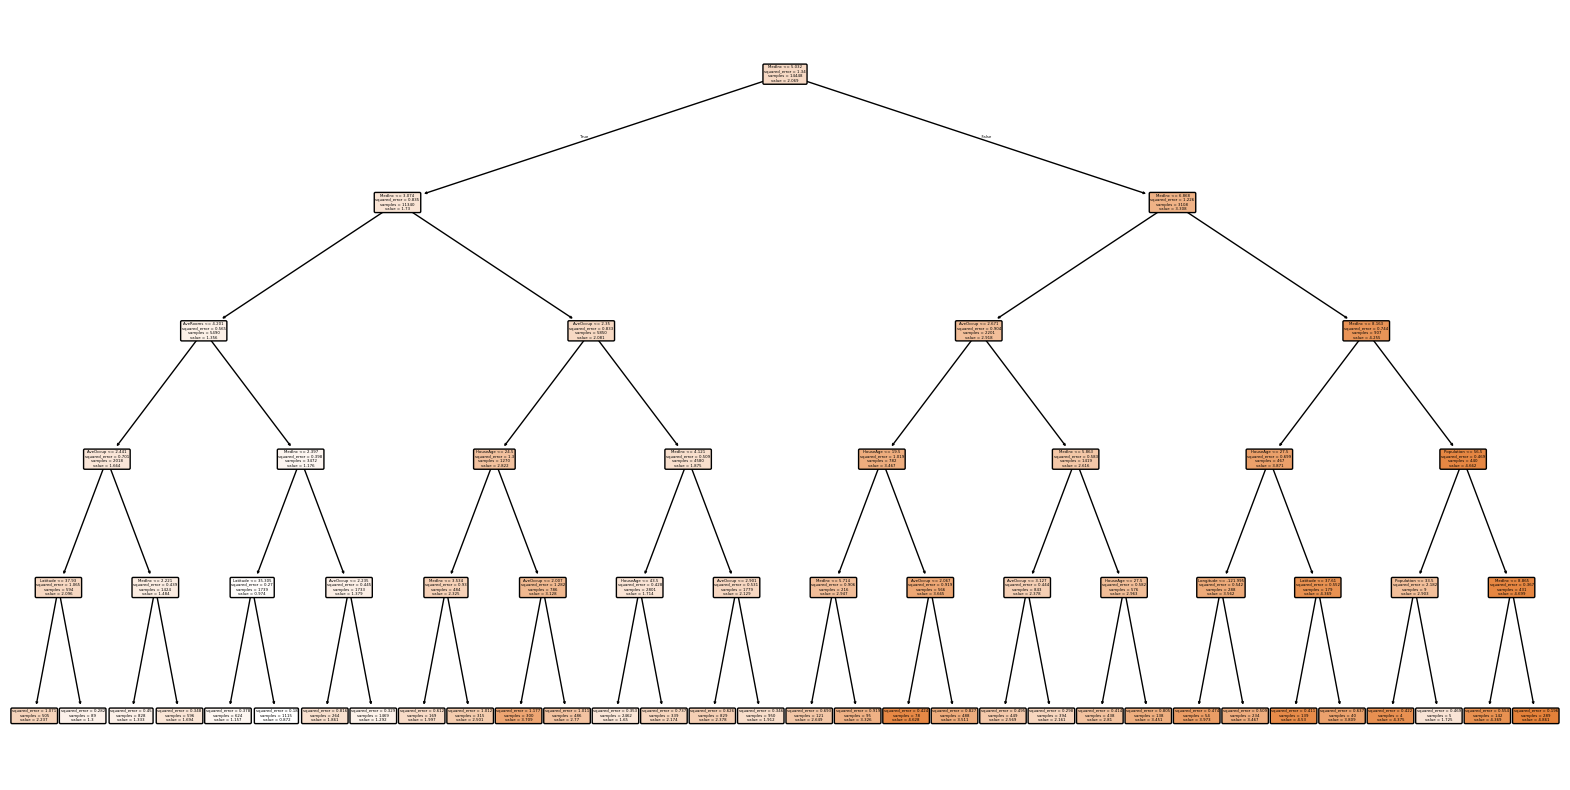

In [3]:
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=data.feature_names, rounded=True)
plt.show()


In [4]:

# 在测试集上进行预测
y_pred = regressor.predict(X_test)

# 计算并打印MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.52


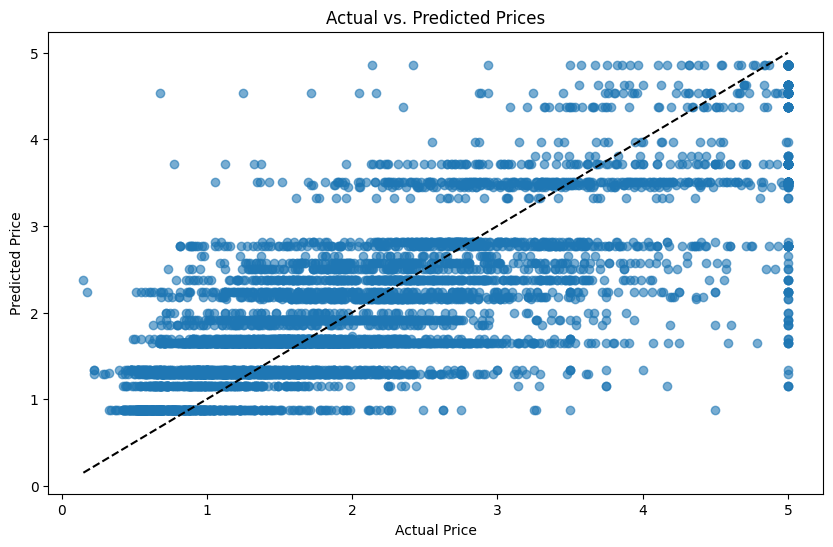

In [5]:
# 绘制实际值与预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # 绘制y=x参考线
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()
